# Group 11: Matching Sector Returns to Macro Factors

## Group members:
### a) Diya Wu (dw2728)
### b)Mainak Moni Pyne (mmp2209)
### c)Chuan Sun (cs3470)

In [ ]:
import os as os
os.chdir("F:\Python_proj")
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Step 1: For Every Sector: Read and Clean the Data

In [266]:
Service_data=pd.read_csv("service_data.csv")
Major_Fac=pd.read_csv("net_data_0427.csv")
Fin_Senti=pd.read_csv("Fin_Senti.csv")

In [267]:
my_service_data=pd.concat([Service_data.set_index('Date'),Major_Fac.set_index('Date'),Fin_Senti.set_index('Date')], axis=1, join='inner')

In [268]:
my_service_data=my_service_data.drop(['CPIAUCSL', 'INDPRO', 'PMI',"Cluster_number","k-1","k-2","k-3",'Unnamed: 0'],axis=1)

In [269]:
my_service_data=my_service_data.dropna(axis=0)

In [270]:
my_service_data.columns

Index(['Sirius XM Holdings Inc. (SIRI)', 'Comcast Corporation (CMCSA)',
       'McDonald's Corporation (MCD)', 'FedEx Corporation (FDX)',
       'Wal-Mart Stores, Inc. (WMT)', 'S.P.500...GSPC.',
       'CBOE.Interest.Rate.10.Year.T.No...TNX.', 'Nikkei.225...N225.',
       'Dow.Jones.Industrial.Average...DJI.', 'ESTX50.EUR.P...STOXX50E.',
       'PHLX.Gold.Silver.Sector...XAU.', '1-month LIBOR', '10yr treasury',
       'gold price', 'UNRATE', 'UMCSENT', 'PPIACO', 'DCOILWTICO', 'Sentiment'],
      dtype='object')

In [18]:
#my_congo_data=my_congo_data.drop(["Unnamed: 0"],axis=1)

In [181]:
my_service_data.to_csv("my_service_data.csv")

# Step 2: Run the R-code now and then retrieve the data with the labels


In [275]:
data_f=pd.read_csv("net_service_data.csv")

In [276]:
data_f=data_f.drop(["Unnamed: 0"],axis=1)

In [277]:
date=data_f["Date"][:400]

In [278]:
data_f=data_f.drop(["Date"],axis=1)

In [279]:
X = data_f.ix[:, data_f.columns != 'Cluster_number']
y = data_f.ix[:, data_f.columns == 'Cluster_number']
#We can index the data to predit the future. For example Index X=X[2:] and y=[:-2] to predict what's going to happen 2 days later
X=X 
y=y
print(len(X))
print(len(y))

2298
2298


In [280]:

#list_3=data_f["Cluster_number"].tolist()
#list_3=[(x-1) for x in list_3]
#y=pd.DataFrame({'Cluster number':list_3})

# Step3: Split the data

In [281]:
X1=X[:400]
y1=y[:400]
X2=X[400:]
y2=y[400:]
X_train,y_train,X_test,y_test=X2,y2,X1,y1

In [282]:
#y_train

In [283]:
def Kfold_validation(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 

    # Different C parameters
    c_parameters = [0.01,0.1,1,10,100]

    results_table = pd.DataFrame(index = range(len(c_parameters),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_parameters

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_para in c_parameters:
        print('-----------')
        print('C parameter: ', c_para)
        print('\n')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            lr = LogisticRegression(C = c_para, penalty = 'l1')

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
            recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('------------')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('Best C parameter = ', best_c)
    return best_c

In [284]:
best_c = Kfold_validation(X_train,y_train)

-----------
C parameter:  0.01



Iteration  1 : recall score =  0.0
Iteration  2 : recall score =  0.0
Iteration  3 : recall score =  0.0
Iteration  4 : recall score =  0.0
Iteration  5 : recall score =  0.0

Mean recall score  0.0
------------
-----------
C parameter:  0.1



Iteration  1 : recall score =  0.0
Iteration  2 : recall score =  0.0
Iteration  3 : recall score =  0.0
Iteration  4 : recall score =  0.0
Iteration  5 : recall score =  0.0

Mean recall score  0.0
------------
-----------
C parameter:  1



Iteration  1 : recall score =  0.461538461538
Iteration  2 : recall score =  0.468253968254
Iteration  3 : recall score =  0.584615384615
Iteration  4 : recall score =  0.605839416058
Iteration  5 : recall score =  0.714285714286

Mean recall score  0.56690658895
------------
-----------
C parameter:  10



Iteration  1 : recall score =  0.592307692308
Iteration  2 : recall score =  0.587301587302
Iteration  3 : recall score =  0.653846153846
Iteration  4 : recall score =  

# Step 3: Run Logistic Regression and plot the necessary Graphs

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,recall_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(MinMaxScaler(),LogisticRegression(C = 0.1, penalty = 'l1',class_weight='balanced'))
lr = LogisticRegression(C = 0.1, penalty = 'l1',class_weight='balanced')
pipe.fit(X_train,y_train.values.ravel())

# lr.fit(X_train,y_train.values.ravel())
y_pred = pipe.predict(X_test.values)

LR_score1=pipe.score(X_test,y_test)

#from sklearn.model_selection import cross_val_predict
#cross-validation
#predicted = cross_val_predict(pipe,X,y, cv=5)
#cr_score = metrics.accuracy_score(y, predicted) 
##Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)
LR_score=cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])

print("Train Score : {:.3f}%".format(pipe.score(X_train,y_train)*100))
print("Test Score : {:.3f}%".format(LR_score1*100))
#print(y_test)


Train Score : 82.297%
Test Score : 80.250%


In [286]:
#y_pred

In [ ]:
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_score = lr.fit(X_train,y_train.values.ravel()).decision_function(X_test.values)

fpr, tpr, thresholds = roc_curve(y_test.values.ravel(),y_pred_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0
Recall metric in the testing dataset:  0.0


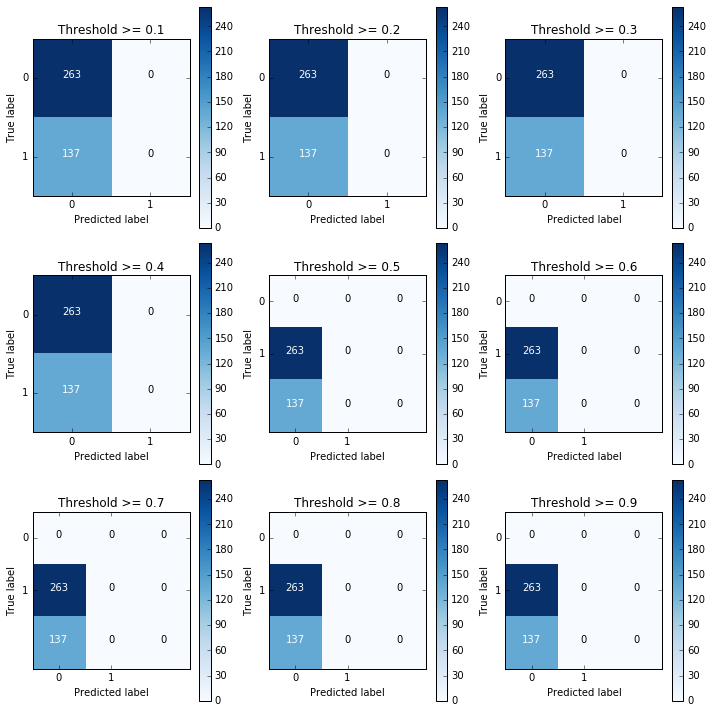

In [137]:
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [219]:
import itertools
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

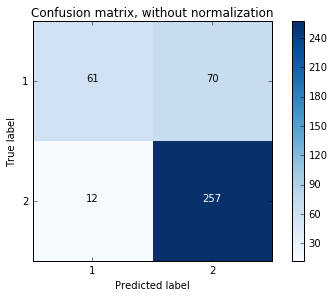

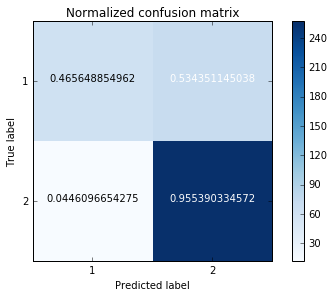

In [220]:
# Use this C_parameter to build the final model with the whole training dataset and predict the classes in the test
# dataset
lr = LogisticRegression(C = 1, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred = lr.predict(X_test.values)
class_names=[1,2]
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
#print("Recall metric in the testing dataset: ", recall_score(y_pred,y_test))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
from itertools import cycle

lr = LogisticRegression(C = 10, penalty = 'l1')
lr.fit(X_train,y_train.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

# Step 4: Run Decision Tree Classifier

In [288]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#Decision Trees
dt = DecisionTreeClassifier(max_depth=11,random_state=99,class_weight='balanced')
dt.fit(X_train, y_train)
dt_result=dt.score(X_test,y_test)
dt_result1=dt.score(X_train,y_train)
y_pred1=dt.predict(X_test)
print("Train_accuracy:",dt_result1,"Test_accuracy:",dt_result)

Train_accuracy: 0.963645943098 Test_accuracy: 0.7475


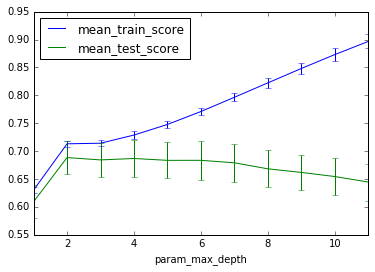

In [243]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 12)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100))
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

# Step 5: AdaBooster

In [262]:
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier

ada=AdaBoostClassifier()

ada.fit(X_train,y_train)
proba=ada.predict_proba(X_train)
ada_result=ada.score(X_test,y_test)
y_pred5=ada.predict(X_test)
print("probability:",proba,"score:",ada_result)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


probability: [[ 0.26  0.24  0.26  0.24]
 [ 0.26  0.25  0.26  0.23]
 [ 0.25  0.25  0.25  0.25]
 ..., 
 [ 0.26  0.25  0.26  0.24]
 [ 0.26  0.25  0.25  0.24]
 [ 0.26  0.24  0.26  0.24]] score: 0.46


# Step6: Run RandomForest Classifier

In [289]:
#y_pred5

In [291]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
#from math import sqrt
#X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.15,random_state=0)#random_state=42,test_size=0.2)

#n_features=X_train.shape[1]
clf = RandomForestClassifier( oob_score=True, n_estimators=300,max_features = 'auto', random_state=0,max_depth=None, min_samples_split=3,class_weight='balanced')
#scores = cross_val_score(clf, X_train, y_train)
#print(scores.mean())

classifier = clf.fit(X_train,y_train)
#predictions = classifier.predict_proba(X_test)
# pred_rf = rf.predict_proba(X_test)
# pred = voting.predict(X_test)
print(" Score: {:.3f}".format(clf.score(X_test,y_test)*100))
print(" Score: {:.3f}".format(clf.score(X_train,y_train)*100))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


 Score: 80.250
 Score: 100.000


In [292]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf.feature_importances_

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


array([ 0.06,  0.28,  0.06,  0.06,  0.31,  0.06,  0.05,  0.05,  0.  ,
        0.01,  0.  ,  0.07])

([<matplotlib.axis.YTick at 0x1e54bcb1748>,
 <a list of 12 Text yticklabel objects>)

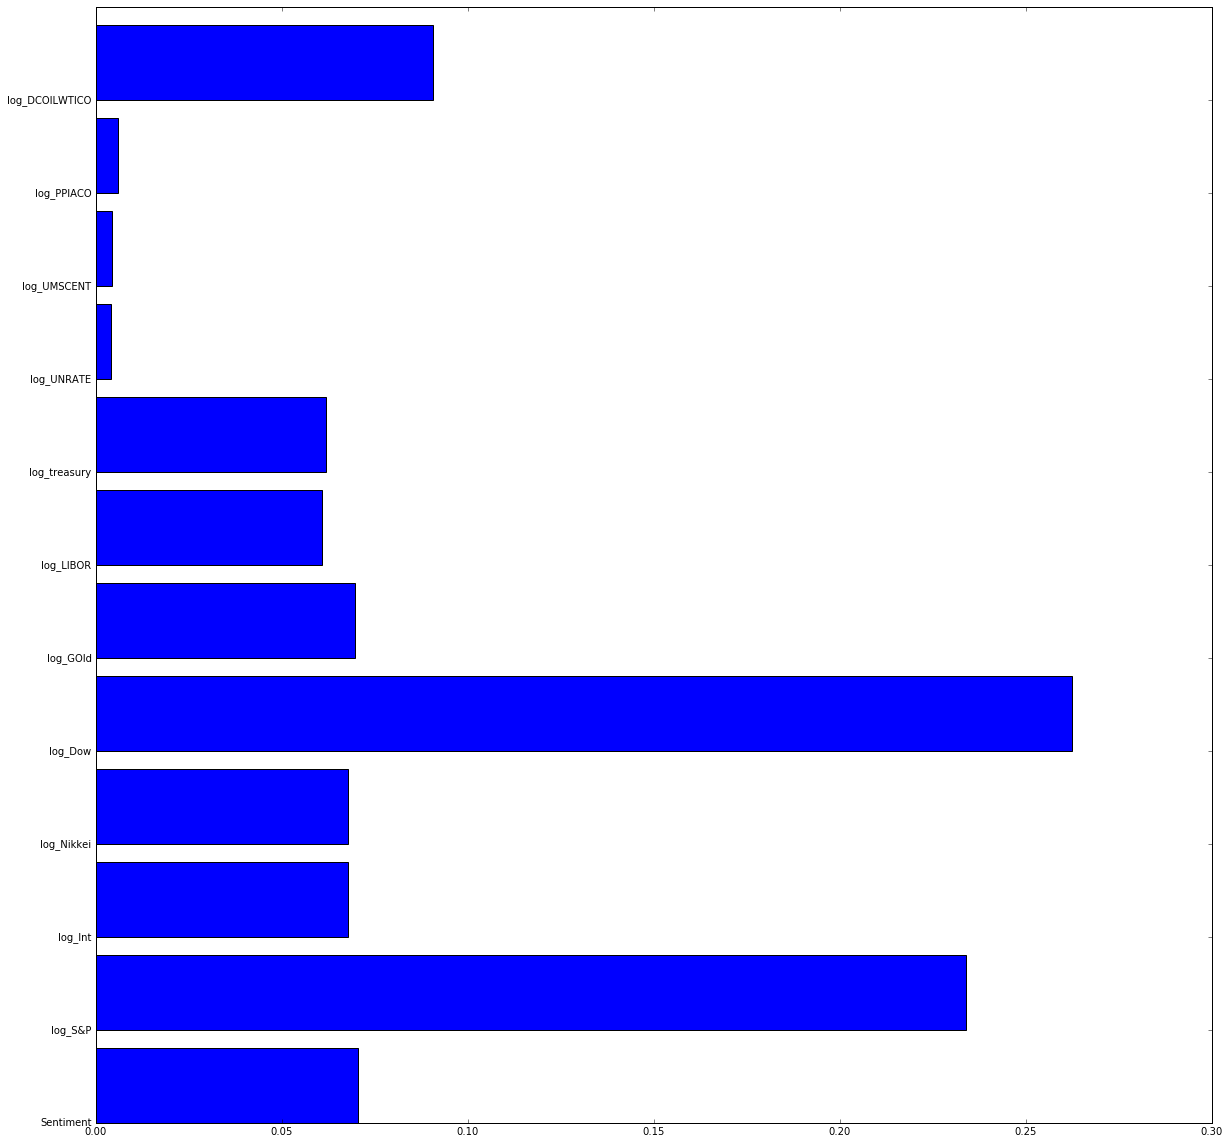

In [248]:
plt.figure(figsize=(20,20))
plt.barh(range(12), rf.feature_importances_)
plt.yticks(range(12), X_train.columns.values)

In [264]:
y_pred_rf=rf.predict(X_test)

In [265]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [251]:

df_2 = pd.DataFrame(y_pred,columns=["prediction_congo"])
df_2 = pd.concat([date,df_2],axis=1)
df_2.to_csv("prediction1_service(4 Clusters).csv")

In [338]:
newdf=pd.read_csv("prediction3_fin.csv")
df_2 = pd.concat([date,newdf],axis=1)
df_2.to_csv("prediction1_fin.csv")

In [210]:
df_2 = pd.DataFrame(y_pred5,columns=["prediction_congo"])
df_2 = pd.concat([date,df_2],axis=1)
df_2.to_csv("prediction3_service(4 Clusters).csv")

In [478]:
df_4 = pd.DataFrame(y_pred,columns=["prediction_fin"])
df_4 = pd.concat([date,df_4],axis=1)
df_4.to_csv("prediction3_fin(4 clusters).csv")

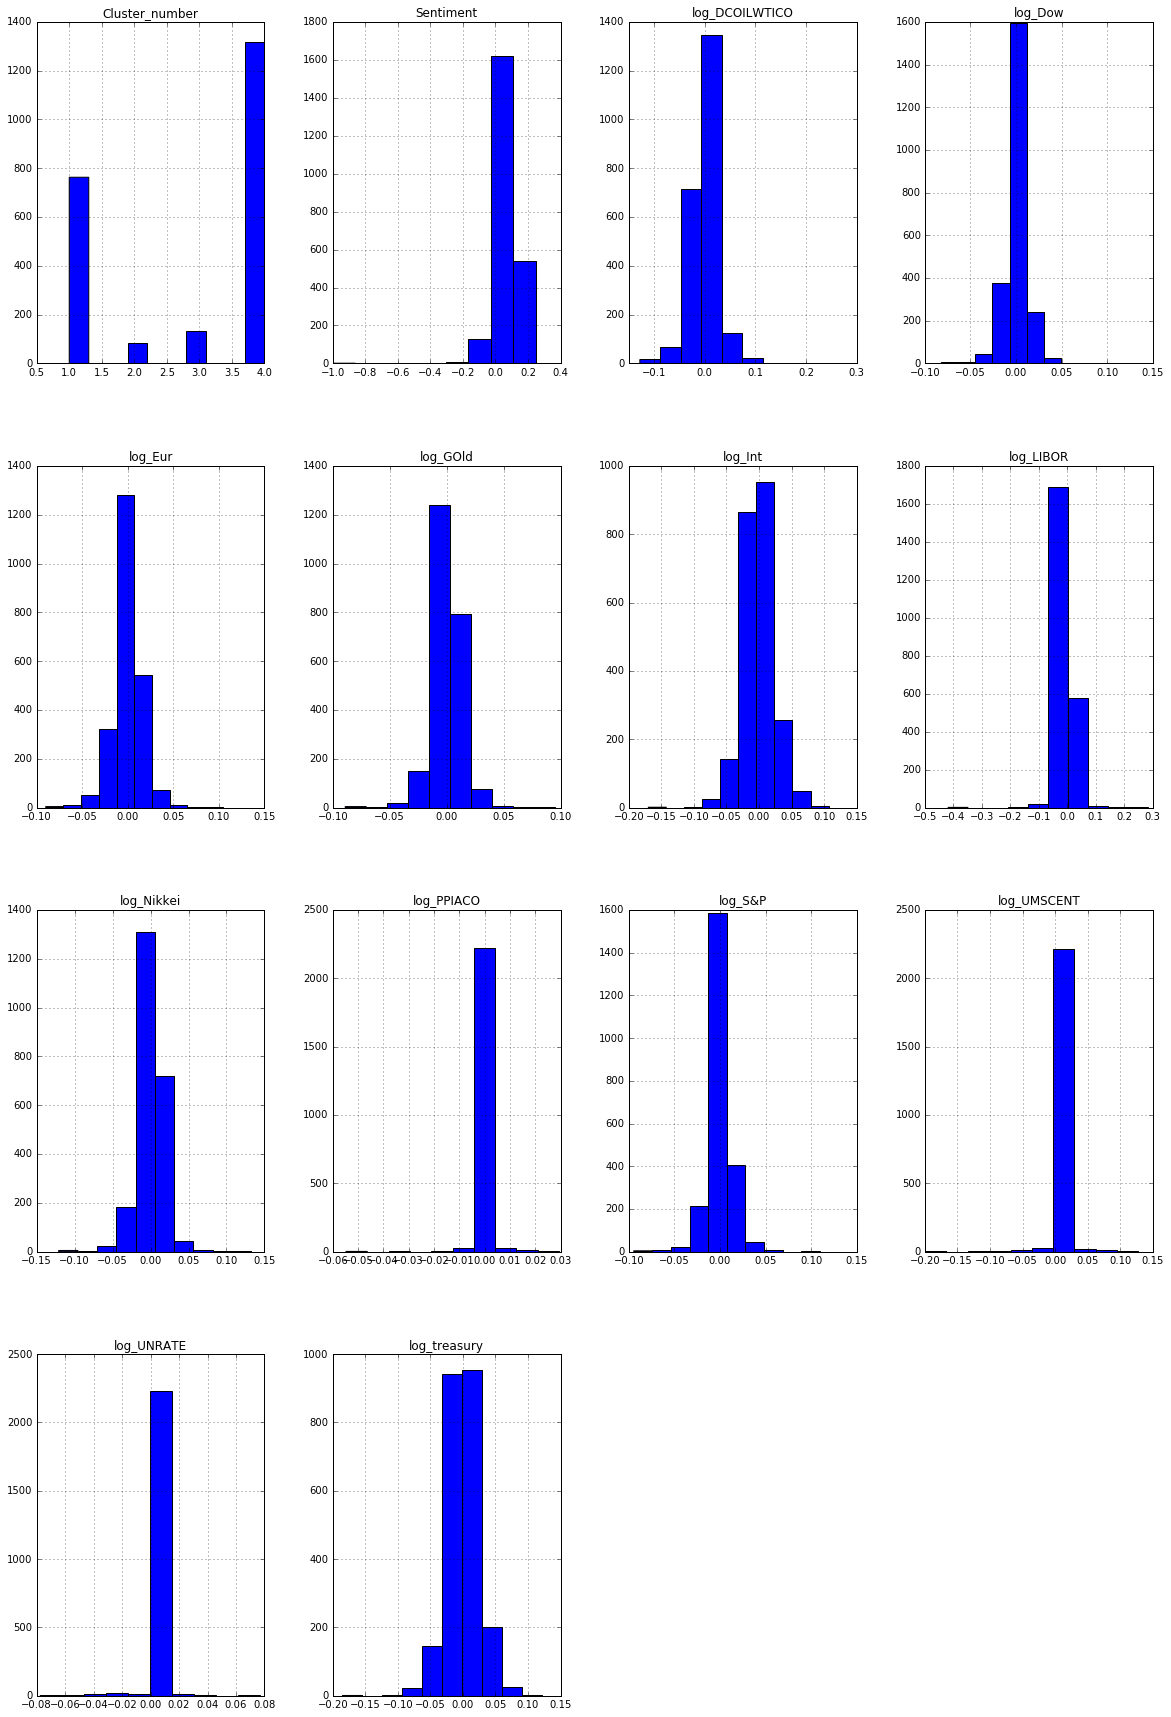

In [300]:
data_f.hist(figsize=[20,30]);